In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
                                       #### weather data analysis   ###

In [2]:
# import the data from the source

In [3]:
data = pd.read_csv('seattle-weather.csv')
data

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

In [4]:
# checking the null in the data

In [5]:
data.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1456    0
1457    0
1458    0
1459    0
1460    0
Length: 1461, dtype: int64

In [6]:
# check the various data types in the columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
data.replace(to_replace ="rain", value = 2, inplace = True)
data.replace(to_replace ="drizzle", value = 3, inplace = True)
data.replace(to_replace ="fog", value = 4, inplace = True)
data.replace(to_replace ="sun", value = 5, inplace = True)
data.replace(to_replace ="snow", value = 1, inplace = True)
data

date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        3
1     2012-01-02           10.9      10.6       2.8   4.5        2
2     2012-01-03            0.8      11.7       7.2   2.3        2
3     2012-01-04           20.3      12.2       5.6   4.7        2
4     2012-01-05            1.3       8.9       2.8   6.1        2
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        2
1457  2015-12-28            1.5       5.0       1.7   1.3        2
1458  2015-12-29            0.0       7.2       0.6   2.6        4
1459  2015-12-30            0.0       5.6      -1.0   3.4        5
1460  2015-12-31            0.0       5.6      -2.1   3.5        5

[1461 rows x 6 columns]

In [9]:
data1=data.drop(['date'],axis=1)

In [10]:
x=data1.drop(['weather'],axis=1)
y=pd.DataFrame(data1.weather)

In [11]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30)

In [12]:
x_train

precipitation  temp_max  temp_min  wind
220            0.0      22.2      15.0   3.1
744            0.0      11.1       7.2   1.3
883            0.0      23.3      11.1   2.4
478            0.0      17.8       3.9   2.8
407            0.3       8.3       4.4   1.4
..             ...       ...       ...   ...
822            0.0      14.4       5.6   4.2
795            3.0      13.3      10.0   6.2
717            1.3       7.8       2.2   2.8
576            0.0      25.0      13.3   2.8
31            13.5       8.9       3.3   2.7

[1022 rows x 4 columns]

In [13]:
x_test

precipitation  temp_max  temp_min  wind
434             0.8       7.8       3.9   1.6
592             1.8      21.1      17.2   1.0
894             6.4      15.6      11.1   5.0
1158            0.0      12.8      -0.5   1.8
48              6.4       6.7       3.9   8.1
...             ...       ...       ...   ...
718             0.0       5.0       0.0   2.1
168             0.0      18.9      11.7   6.4
268             0.0      19.4      11.1   1.7
1065            0.0       4.4      -3.2   2.2
21              6.1       6.7       2.2   4.8

[439 rows x 4 columns]

In [14]:
y_train

weather
220        5
744        5
883        5
478        5
407        2
..       ...
822        5
795        2
717        2
576        5
31         2

[1022 rows x 1 columns]

In [15]:
y_test

weather
434         2
592         2
894         2
1158        5
48          2
...       ...
718         5
168         5
268         5
1065        5
21          2

[439 rows x 1 columns]

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
climate_data=LinearRegression().fit(x,y)

In [18]:
climate_data.intercept_

array([2.3954286])

In [19]:
climate_data.coef_

array([[-0.06510139,  0.17292542, -0.16856461, -0.05613537]])

In [20]:
predicted=pd.DataFrame(climate_data.predict(x),columns=['prediction'])
predicted

prediction
0       3.502215
1       2.794243
2       3.023798
3       1.975762
4       3.035426
...          ...
1456    2.147076
1457    2.802868
1458    3.393401
1459    3.341515
1460    3.521323

[1461 rows x 1 columns]

In [21]:
predicted_data=pd.concat([y,x,predicted],axis=1)
predicted_data=predicted_data.dropna()

In [22]:
predicted_data

weather  precipitation  temp_max  temp_min  wind  prediction
0           3            0.0      12.8       5.0   4.7    3.502215
1           2           10.9      10.6       2.8   4.5    2.794243
2           2            0.8      11.7       7.2   2.3    3.023798
3           2           20.3      12.2       5.6   4.7    1.975762
4           2            1.3       8.9       2.8   6.1    3.035426
...       ...            ...       ...       ...   ...         ...
1456        2            8.6       4.4       1.7   2.9    2.147076
1457        2            1.5       5.0       1.7   1.3    2.802868
1458        4            0.0       7.2       0.6   2.6    3.393401
1459        5            0.0       5.6      -1.0   3.4    3.341515
1460        5            0.0       5.6      -2.1   3.5    3.521323

[1461 rows x 6 columns]

In [24]:
predicted_data['error_per']=abs(predicted_data.weather-predicted_data.prediction)/(predicted_data.weather)
predicted_data

weather  precipitation  temp_max  temp_min  wind  prediction  error_per
0           3            0.0      12.8       5.0   4.7    3.502215   0.167405
1           2           10.9      10.6       2.8   4.5    2.794243   0.397121
2           2            0.8      11.7       7.2   2.3    3.023798   0.511899
3           2           20.3      12.2       5.6   4.7    1.975762   0.012119
4           2            1.3       8.9       2.8   6.1    3.035426   0.517713
...       ...            ...       ...       ...   ...         ...        ...
1456        2            8.6       4.4       1.7   2.9    2.147076   0.073538
1457        2            1.5       5.0       1.7   1.3    2.802868   0.401434
1458        4            0.0       7.2       0.6   2.6    3.393401   0.151650
1459        5            0.0       5.6      -1.0   3.4    3.341515   0.331697
1460        5            0.0       5.6      -2.1   3.5    3.521323   0.295735

[1461 rows x 7 columns]

In [ ]:
# calculate error

In [25]:
predicted_data.error_per.mean()

0.34248581784343823

In [ ]:
# error in the model is 34.25%

In [ ]:
# calculate accuracy in the model

In [26]:
1-predicted_data.error_per.mean()

0.6575141821565618

In [ ]:
# accuracy in the model is 65.75%

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(predicted_data.weather,predicted_data.prediction)

0.42115029836124784

In [ ]:
                                           ### weaher data Visualization   ###

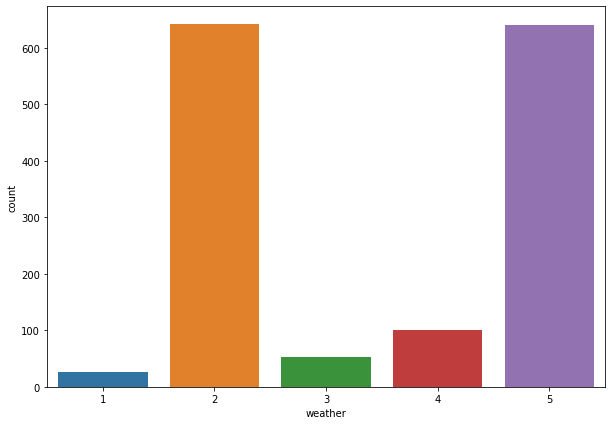

In [30]:
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='weather')
plt.show()

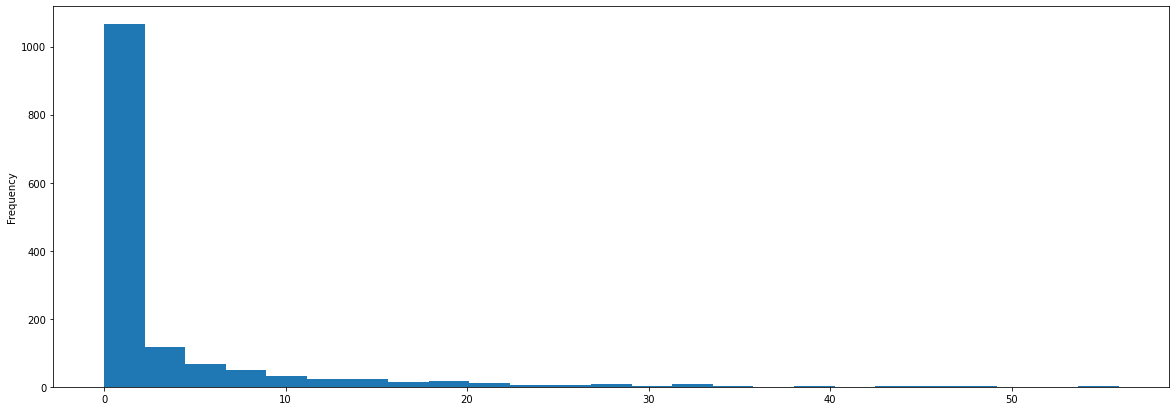

In [33]:
data['precipitation'].plot.hist(bins=25, figsize=(20, 7))
plt.show()

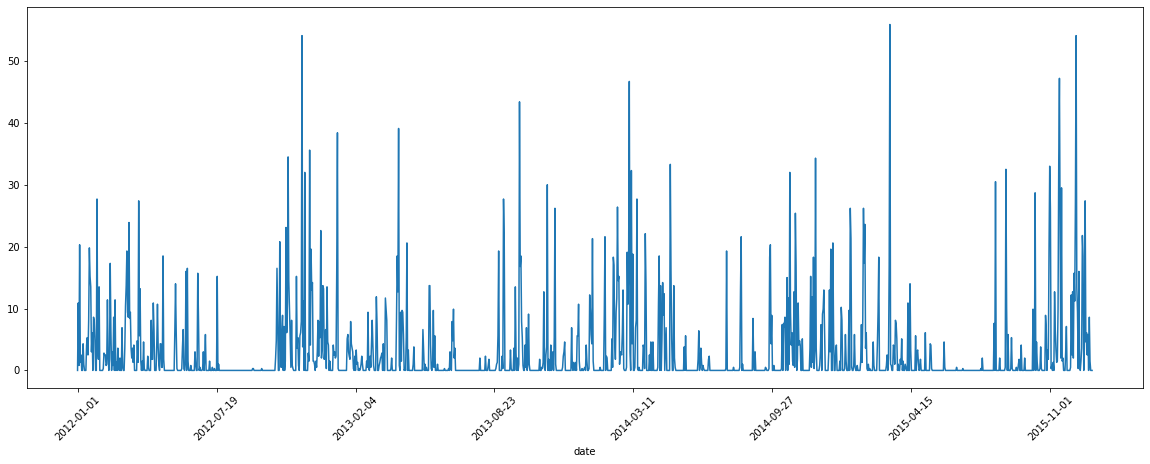

In [34]:
data.groupby('date')['precipitation'].mean().plot(figsize=(20, 7))
plt.xticks(rotation=45)
plt.show()

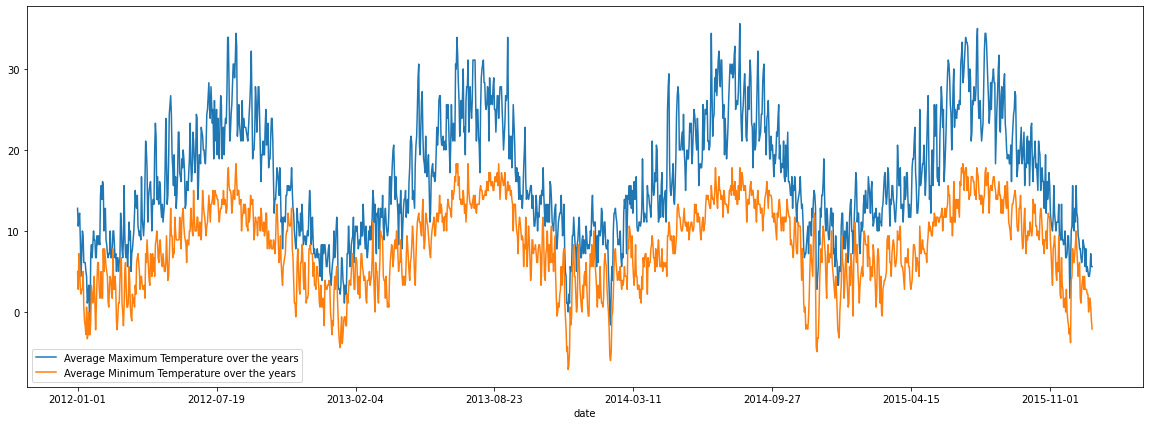

In [40]:
plt.figure(figsize=(20, 7))
data.groupby('date')['temp_max'].mean().plot(label='Average Maximum Temperature over the years')
data.groupby('date')['temp_min'].mean().plot(label='Average Minimum Temperature over the years')
plt.legend(loc='best')
plt.show()

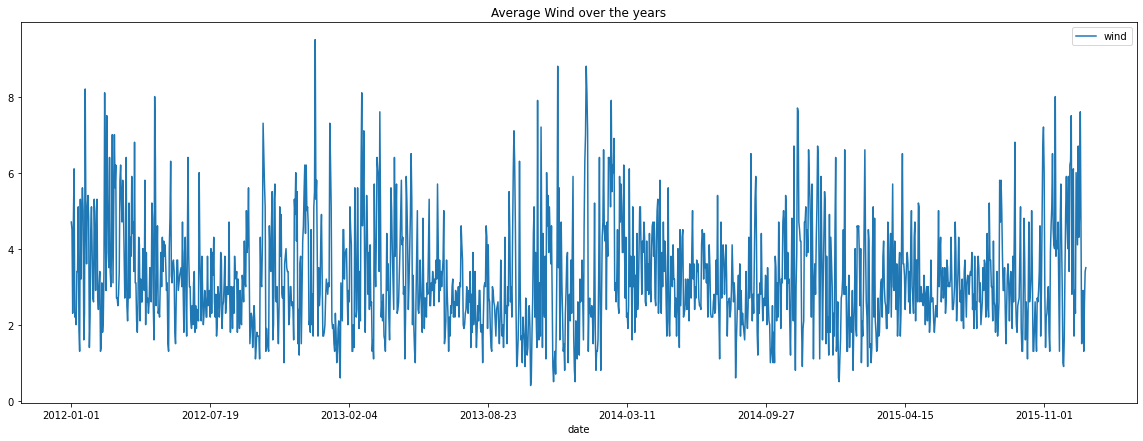

In [41]:
plt.figure(figsize=(20, 7))
data.groupby('date')['wind'].mean().plot(title='Average Wind over the years')
plt.legend(loc='best')
plt.show()

In [44]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['dayofyear'] = data['date'].dt.dayofyear

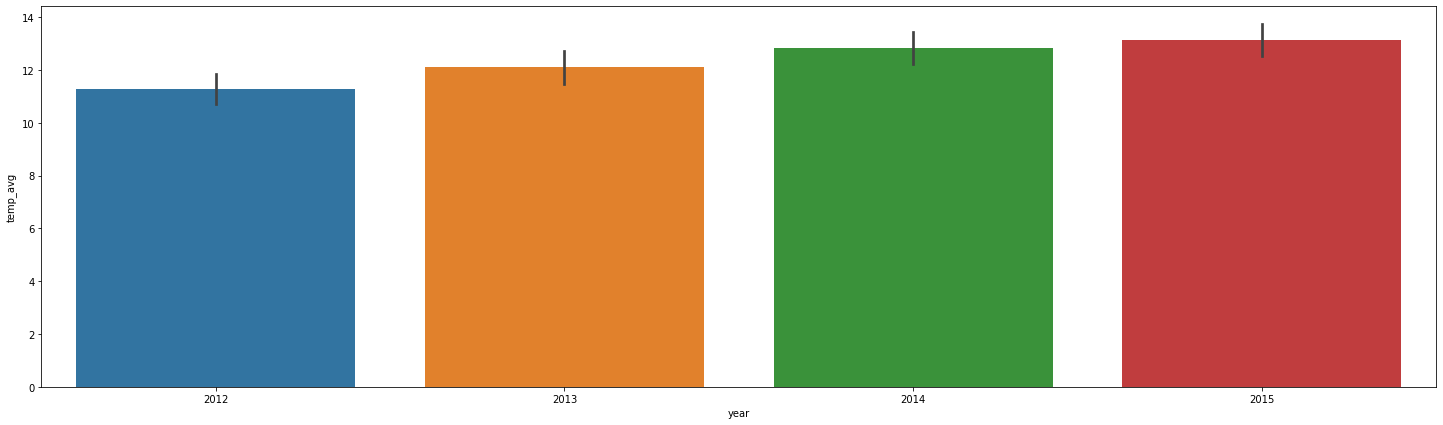

In [48]:
data['temp_avg'] = (data['temp_max'] + data['temp_min'])/2
plt.figure(figsize=(25, 7))
sns.barplot(data=data, x='year', y='temp_avg')
plt.show()

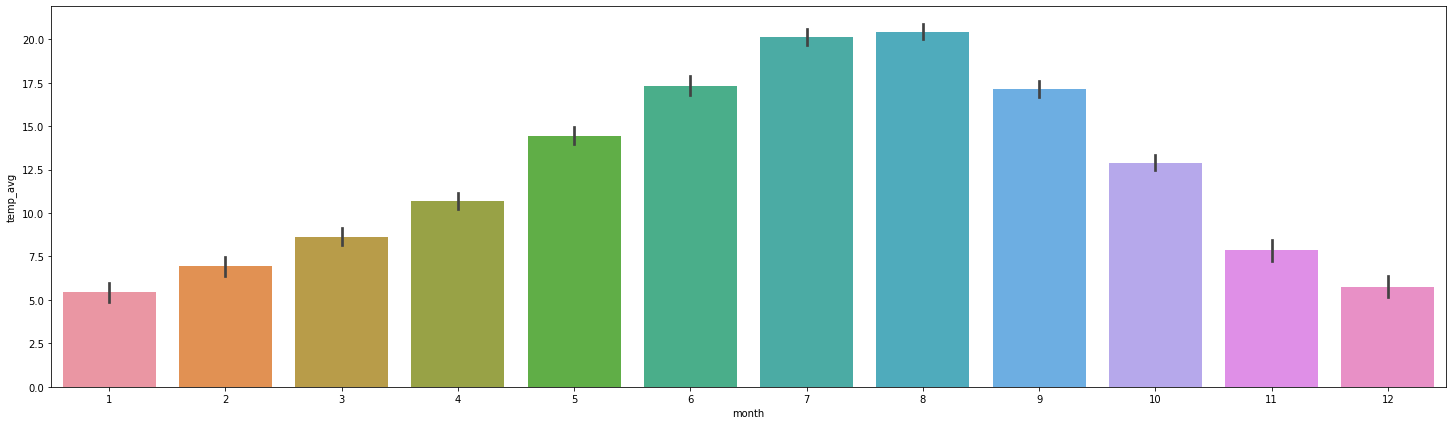

In [47]:
plt.figure(figsize=(25, 7))
sns.barplot(data=data, x='month', y='temp_avg')
plt.show()

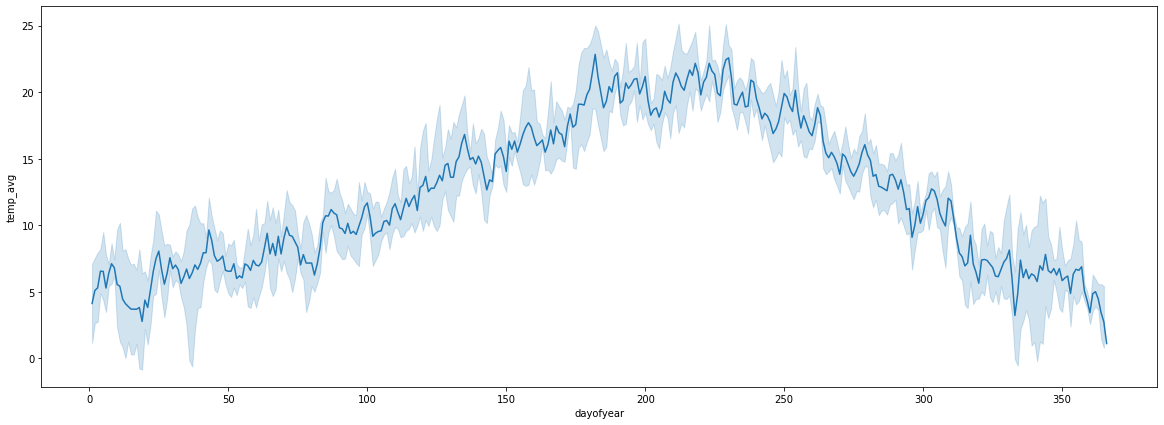

In [49]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=data, x='dayofyear', y='temp_avg')
plt.show()

In [51]:
import plotly.express as px

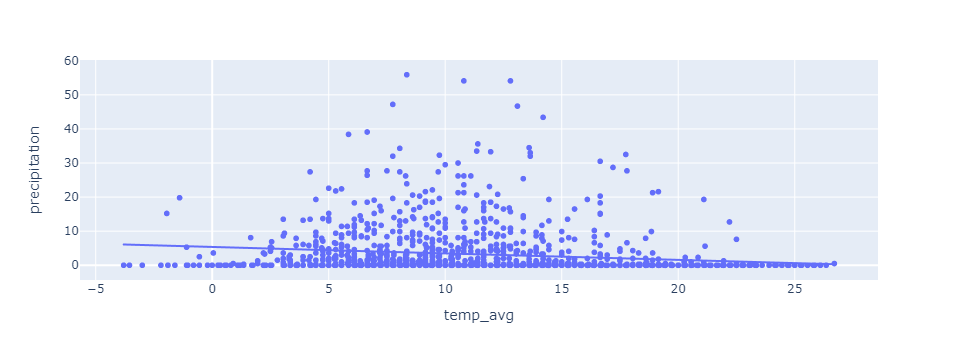

In [52]:
px.scatter(data, x='temp_avg', y='precipitation', trendline='ols')

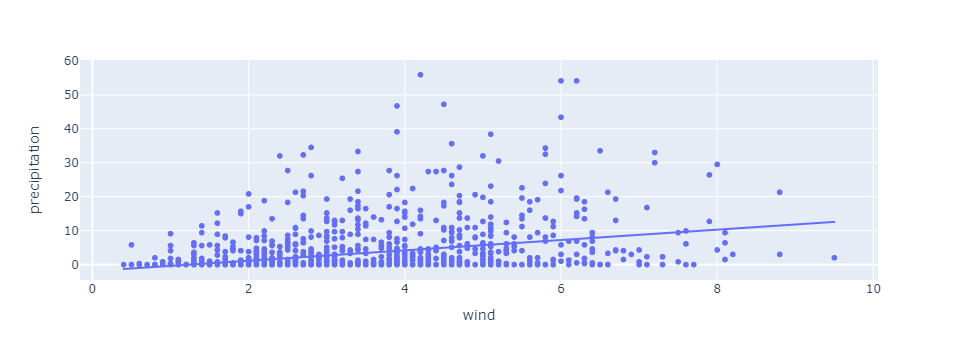

In [53]:
px.scatter(data, x='wind', y='precipitation', trendline='ols')

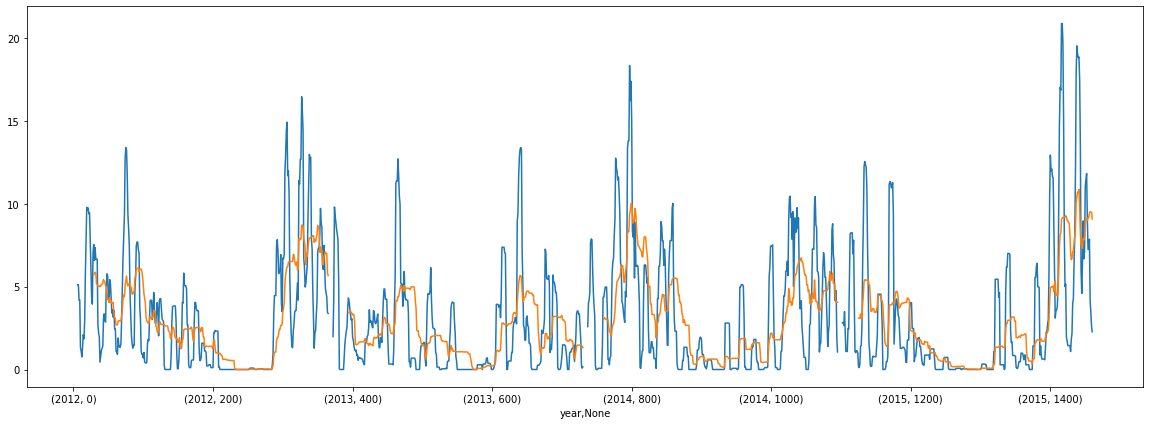

In [58]:
data.groupby('year')['precipitation'].rolling(7).mean().plot(figsize=(20, 7))
data.groupby('year')['precipitation'].rolling(30).mean().plot(figsize=(20, 7))
plt.show()

<Figure size 1296x432 with 0 Axes>

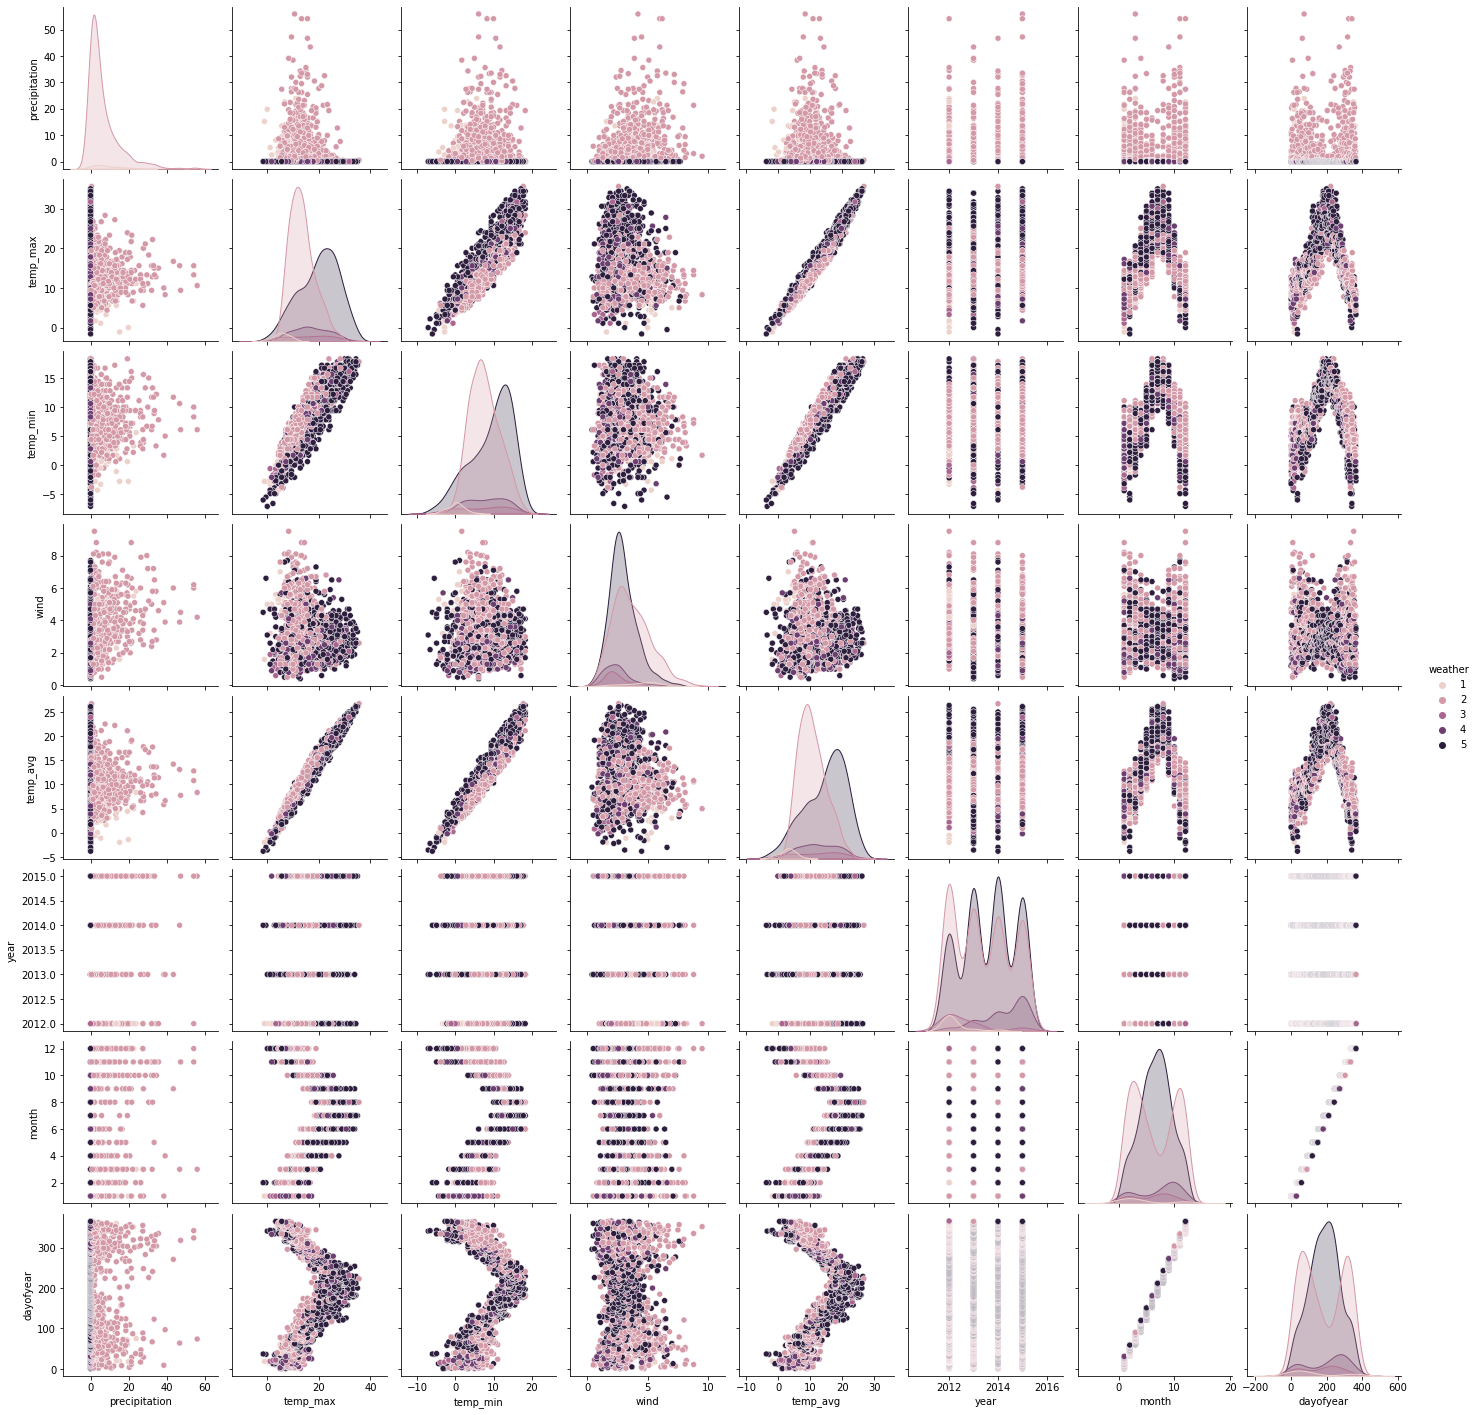

In [61]:
plt.figure(figsize=(18,6))
sns.pairplot(data.drop('date',axis=1),hue='weather')
plt.show()